In [32]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor

In [ ]:
IBMQ.load_account()

# Grover Search
This file contains the implementation of the Grover Search problem and variations of the algorithm applied to different data structures (quantum walks) and using a different method (QAOA). 

We start out by importing the files containing the functions that will be used to construct the circuits.

The aproach was to create an oracle and a diffusion operator by implementing their respective diagonal matrices and subsequently use qiskit to create an equivalent circuit. We then append the oracle and diffusion operators to the specific data structure in the overarching search function. The only exception to this is the QAOA algorithm, that requires a different methodology due to the nature of the algorithm.

In [20]:
%run groverFuncs.py
%run bipartiteGraphFuncs.py
%run completeGraphFuncs.py

## Generic Grover

In [96]:
NG=4
limit = 2**N -1
marked = [0]
qcG = grover2(marked,NG,3)

## Grover Search in a Complete Graph

In [131]:
NC=4

qregC = QuantumRegister(NC)
qcoinC = QuantumRegister(NC)
cregC = ClassicalRegister(NC)

qcC = QuantumCircuit(qregC,qcoinC,cregC)
limit = 2**N -1
qcC = runWalk2(qcC,qregC,qcoinC,cregC,[0],NC,4)

## Bipartite Graph

In [106]:
NB=4
n=N-1
qregB = QuantumRegister(NB,'qreg')
qcoinB = QuantumRegister(n,'qcoin')
cregB = ClassicalRegister(NB)

qcB =runWalkBipartite2(qregB,qcoinB,cregB,[0],NB,n,4)

## Results

### QASM

In [130]:
# plot_histogram(simul(qcB))
# plot_histogram(simul(qcC))
# plot_histogram(simul(qcG))

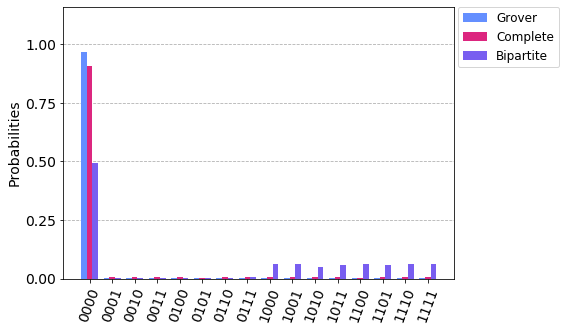

In [137]:
# plot_histogram([simul(qcG),simul(qcB),simul(qcC)],legend=['Grover', 'Bipartite','Complete'],bar_labels=True)
plot_histogram([simul(qcG),simul(qcC),simul(qcB)],legend=['Grover', 'Complete','Bipartite'],bar_labels=False)